In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'xsec_play_fullRun3/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.18/04


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_weighted_V4_improved.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Cross section for single differnetial in Momentum (no sys)

In [4]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_play_fullRun3.root","RECREATE");

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'NuCCana_overlay_V26_mar18.root'
filename_data = 'NuCCana_data_fullRun3.root'
filename_ext = 'NuCCana_ext_V25_G1.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =     2.144e+20  # best with tor875
data_trigger = 51546294.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  85768579.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	1012051
Data: Number of Entries:	784254
Ext: Number of Entries:		1018743
Dirt: Number of Entries:	40808

POT: 
Data:		2.144e+20
Ext:		0
Overlay:	1.26811760704e+21
Dirt:		1.26535223192e+20

Scalefactors: 
Data:		1.0
Ext:		0.600992748172
Overlay:	0.169069492301
Dirt:		1.69438986704


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4_noflux.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	1013969
Data: Number of Entries:	784253
Ext: Number of Entries:		1018742
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 1.58205e+11  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition

#numu_nomuon = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # numu CC signal definition
numu_nomuon = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && (MCTrackPDG!=13 || (MCTrackPDG==13 && MCle_Energy<=0.15))&& MCTrackPurity>0.5' # numu CC signal definition
numu_nue = 'fidVol && MCfidVol && MCNu_CCNC==0 && abs(MCNu_PDG)!=14 && MCTrackPurity>=0.5' # e.g anti nu or nue
numu_antinu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==-14 && MCTrackPurity>=0.5' # e.g anti nu or nue
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1 && MCTrackPurity>=0.5' # nutral current
numu_ov = 'fidVol && !MCfidVol && MCTrackPurity>=0.5' # out of fiducial
numu_cosmic = 'fidVol && MCTrackPurity<0.5' #low purity

#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')

    
energy_cut = ' && MCle_Energy>0.15'
numu_signal = numu_signal+energy_cut
numu_true = numu_true+energy_cut
#numu_nomu = numu_nomu+energy_cut
#numu_lowpur = numu_lowpur+energy_cut
#numu_nc = numu_nc+energy_cut
#numu_ov = numu_ov+energy_cut
#numu_other = numu_other+energy_cut

num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomuon',numu_nomuon)
    x.SetAlias('numu_nue',numu_nue)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_antinu',numu_antinu)
    x.SetAlias('numu_cosmic',numu_cosmic)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = ['numu_cosmic','numu_ov','numu_nc','numu_antinu','numu_nue','numu_nomuon','numu_signal']

for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

#num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomuon',numu_nomuon)
    x.SetAlias('numu_nue',numu_nue)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_antinu',numu_antinu)
    x.SetAlias('numu_cosmic',numu_cosmic)

In [9]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [10]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [11]:

track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'
track_start_uncontained = '(' + track_start_border_x + ' || ' + track_start_border_y + ' || ' + track_start_border_z+ ')'
#t_out->SetAlias("Track_uncontained","((TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5)) || (TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5)) || (TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5)))")
#t_out->SetAlias("Track_uncontained2","((TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5)) || (TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5)) || (TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1039.9-5)))")
#t_out->SetAlias("MCTrack_uncontained","((MCTrackEnd_x <(-1.55+5) || MCTrackEnd_x > (254.8-5)) || (MCTrackEnd_y <(-115.53+5) || MCTrackEnd_y > (117.47-5)) || (MCTrackEnd_z <(0.1+5) || MCTrackEnd_z > (1039.9-5)))")
#t_out->SetAlias("MCTrack2_uncontained","((MCTrackStart_x <(-1.55+5) || MCTrackStart_x > (254.8-5)) || (MCTrackStart_y <(-115.53+5) || MCTrackStart_y > (117.47-5)) || (MCTrackStart_z <(0.1+5) || MCTrackStart_z > (1039.9-5)))")
#t_out->Draw("TrackMomRange_mu:MCTrackMomentum>>h(100,0,2.5,100,0,2.5)","MCTrackPDG==13 && !MCTrack_uncontained && MCTrackPurity>0.8","colz")

data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


252267.0
252755.0 40108.0 15.8683309925


Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/png/True_Signal.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/root/True_Signal.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/pdf/True_Signal.pdf has been created


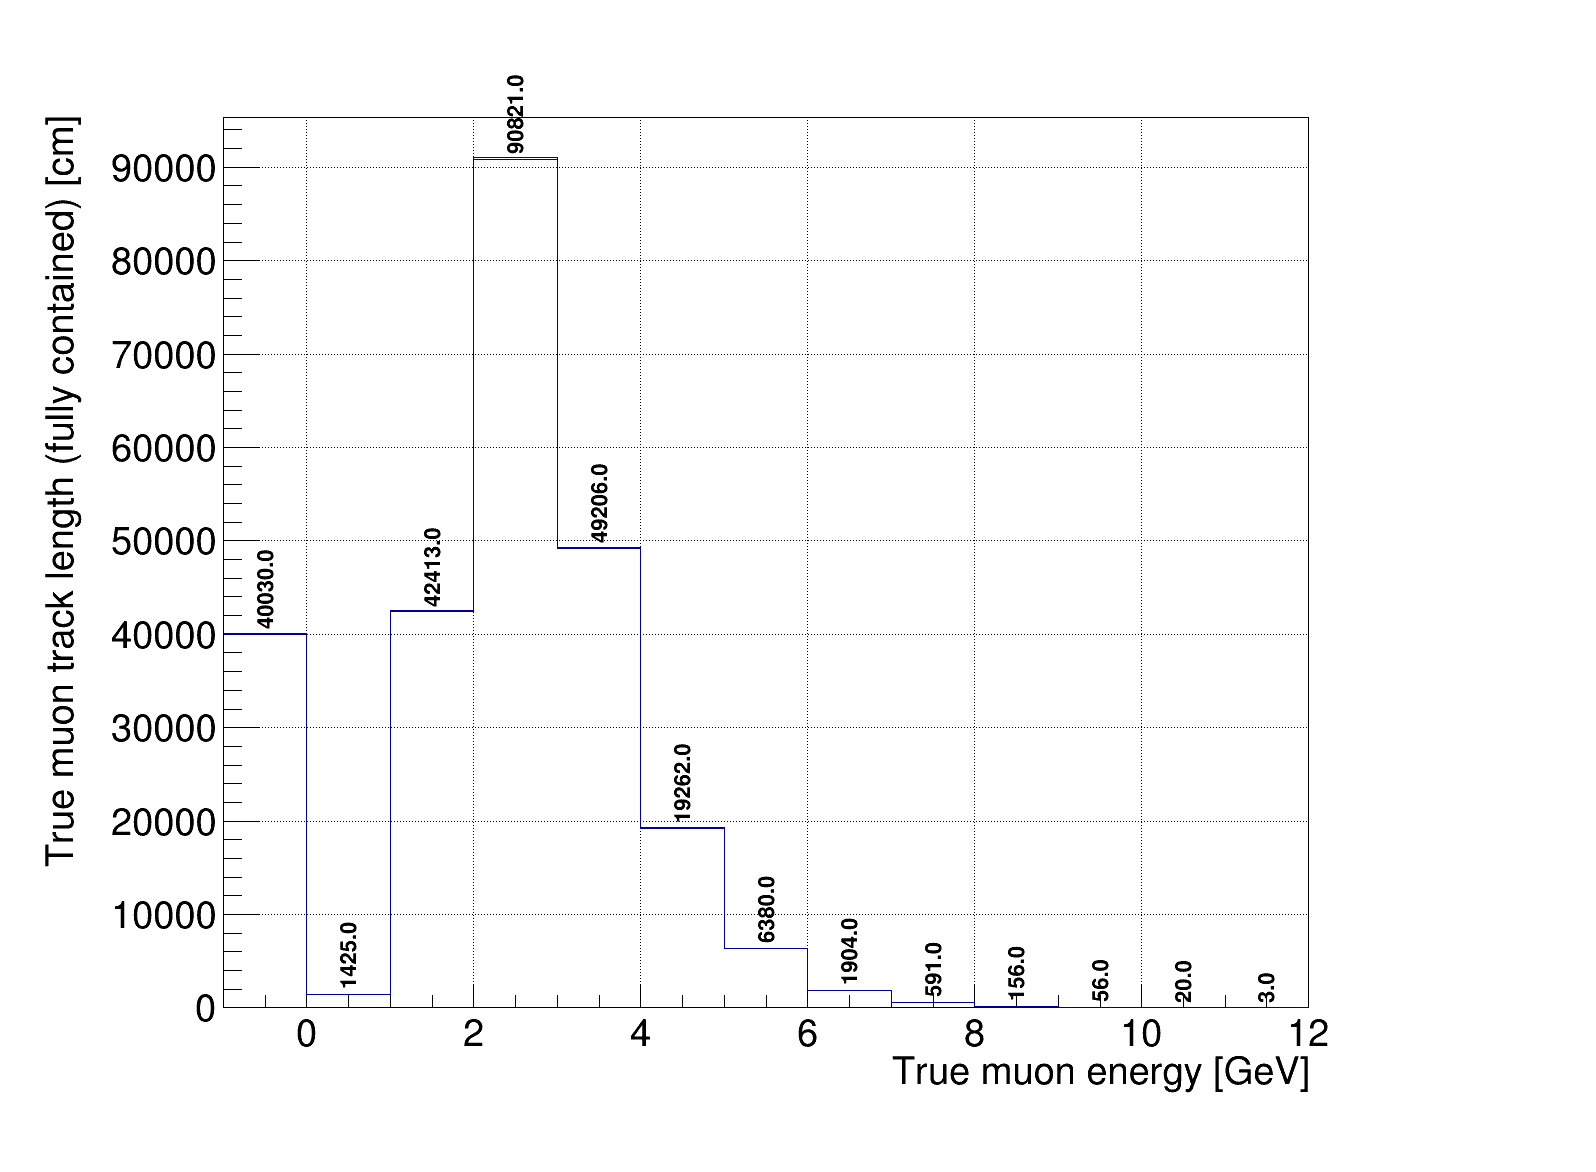

In [31]:
# check MC length for true contaiend tracks
startFidVol = '(MCle_Vx>(-1.55+10) && MCle_Vx<(254.8-10)) && (MCle_Vy>(-115.53+10) && MCle_Vy<(117.47-10)) &&(MCle_Vz>(-0.1+10) && MCle_Vz<(1036.9-50))'
endFidVol = '(MCle_Endx>(-1.55+10) && MCle_Endx<(254.8-10)) && (MCle_Endy>(-115.53+10) && MCle_Endy<(117.47-10)) &&(MCle_Endz>(-0.1+10) && MCle_Endz<(1036.9-50))'
cut = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
name = 'True_Signal'

weight_name = '1'

#variableY = 'MCle_length'
variableX = 'NuTracks'
n_bin = 13
x_start = -1
x_end = 12
ny_bin = 2500
y_start = 0
y_end = 500
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
overlay.Draw(variableX+'>>h1',weight_name+'*('+cut+')')
overlay_out.Draw(variableX+'>>h2',weight_name+'*('+cut+')')
h1.SetXTitle('True muon energy [GeV]')
h1.SetYTitle('True muon track length (fully contained) [cm]')
ROOT.gStyle.SetPaintTextFormat("0.1f");
h1.Draw('text')
h1.Draw('hist same')
h2.Draw('hist same')
c1.SetLogz(0)
c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")
print h1.Integral(-1,20)
print h2.Integral(-1,20),h2.Integral(-1,1) ,h2.Integral(-1,1)*100.0/h2.Integral(-1,20) 

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/png/TrueTrackLengthPerEnergy.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/root/TrueTrackLengthPerEnergy.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/pdf/TrueTrackLengthPerEnergy.pdf has been created


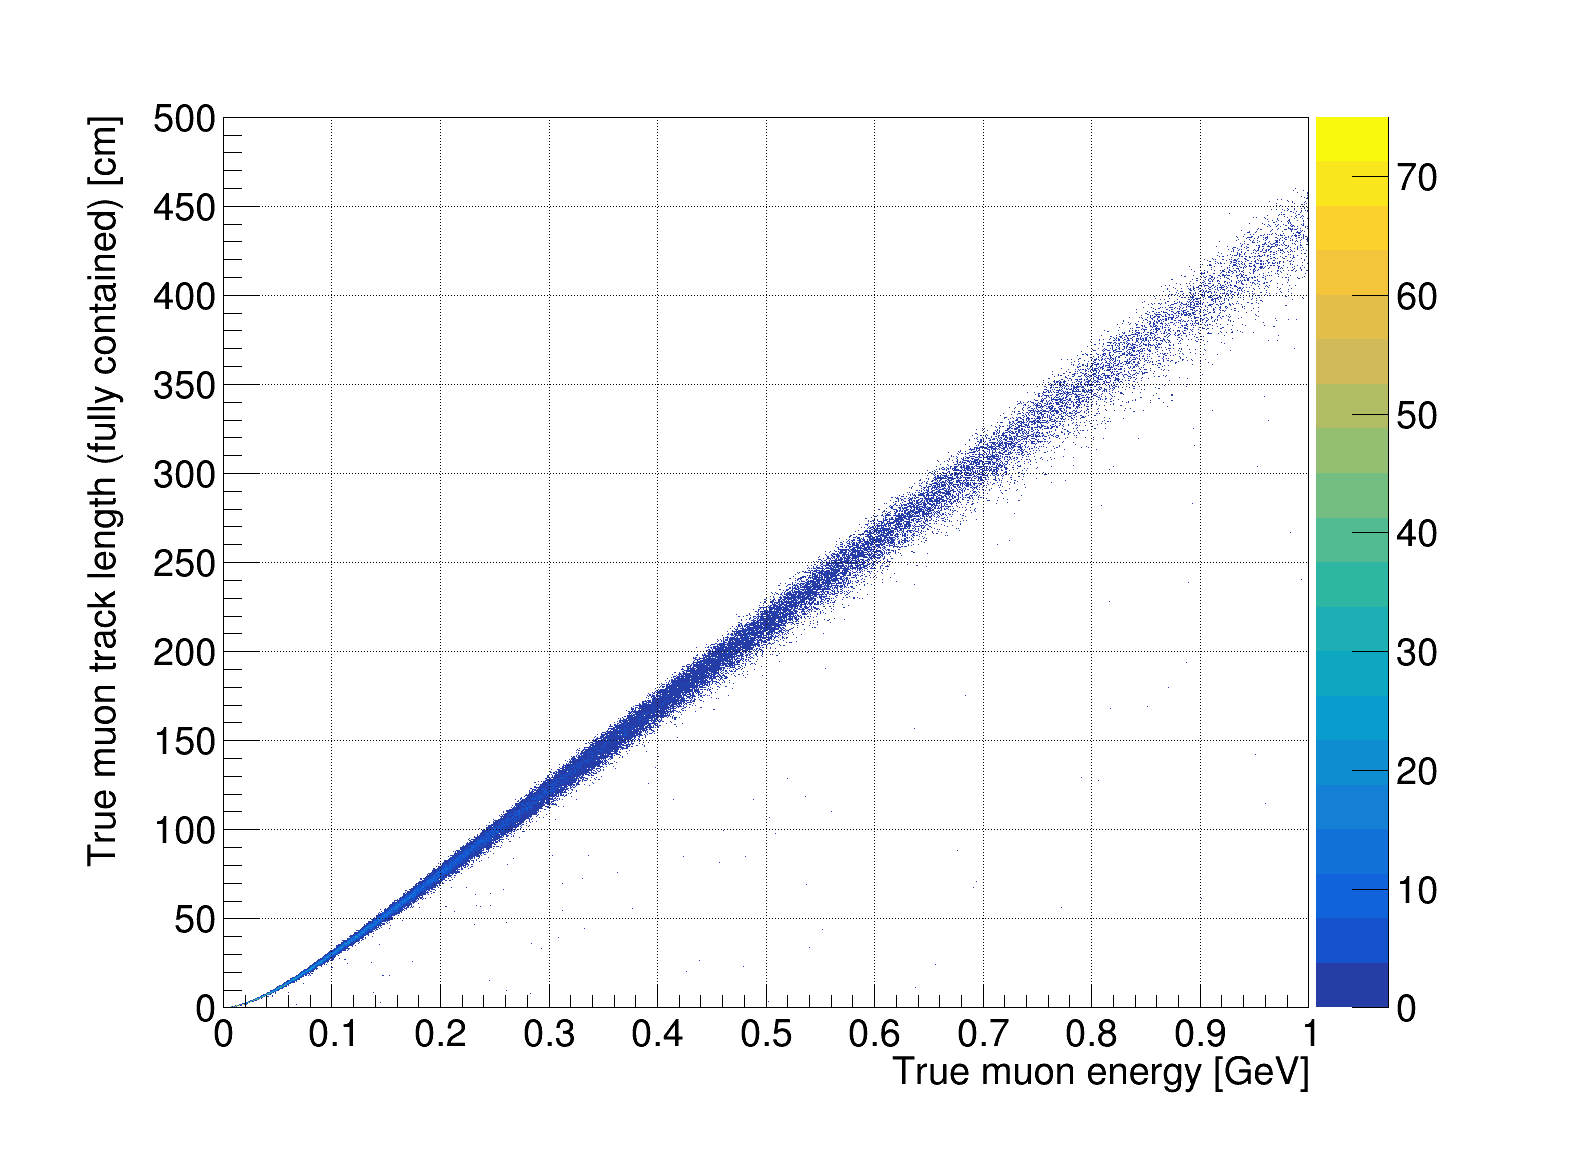

In [39]:
# check MC length for true contaiend tracks
startFidVol = '(MCle_Vx>(-1.55+10) && MCle_Vx<(254.8-10)) && (MCle_Vy>(-115.53+10) && MCle_Vy<(117.47-10)) &&(MCle_Vz>(-0.1+10) && MCle_Vz<(1036.9-50))'
endFidVol = '(MCle_Endx>(-1.55+10) && MCle_Endx<(254.8-10)) && (MCle_Endy>(-115.53+10) && MCle_Endy<(117.47-10)) &&(MCle_Endz>(-0.1+10) && MCle_Endz<(1036.9-50))'
cut = startFidVol+' && '+endFidVol+' && MCle_PDG==13'
name = 'TrueTrackLengthPerEnergy'

weight_name = '1'

variableY = 'MCle_length'
variableX = 'sqrt(MCle_Energy*MCle_Energy + 0.105*0.105)-0.105'
n_bin = 1000
x_start = 0
x_end = 1
ny_bin = 2500
y_start = 0
y_end = 500
h1 = ROOT.TH2F('h1','h1',n_bin,x_start,x_end,ny_bin,y_start,y_end)
overlay_out.Draw(variableY+':'+variableX+'>>h1',weight_name+'*('+cut+')')
h1.SetXTitle('True muon energy [GeV]')
h1.SetYTitle('True muon track length (fully contained) [cm]')
ROOT.gStyle.SetPaintTextFormat("0.1f");
h1.Draw('colz')
c1.SetLogz(0)
c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")
h_uboone = h1.Clone()

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/png/ProtoVsUBoone.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/root/ProtoVsUBoone.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/pdf/ProtoVsUBoone.pdf has been created


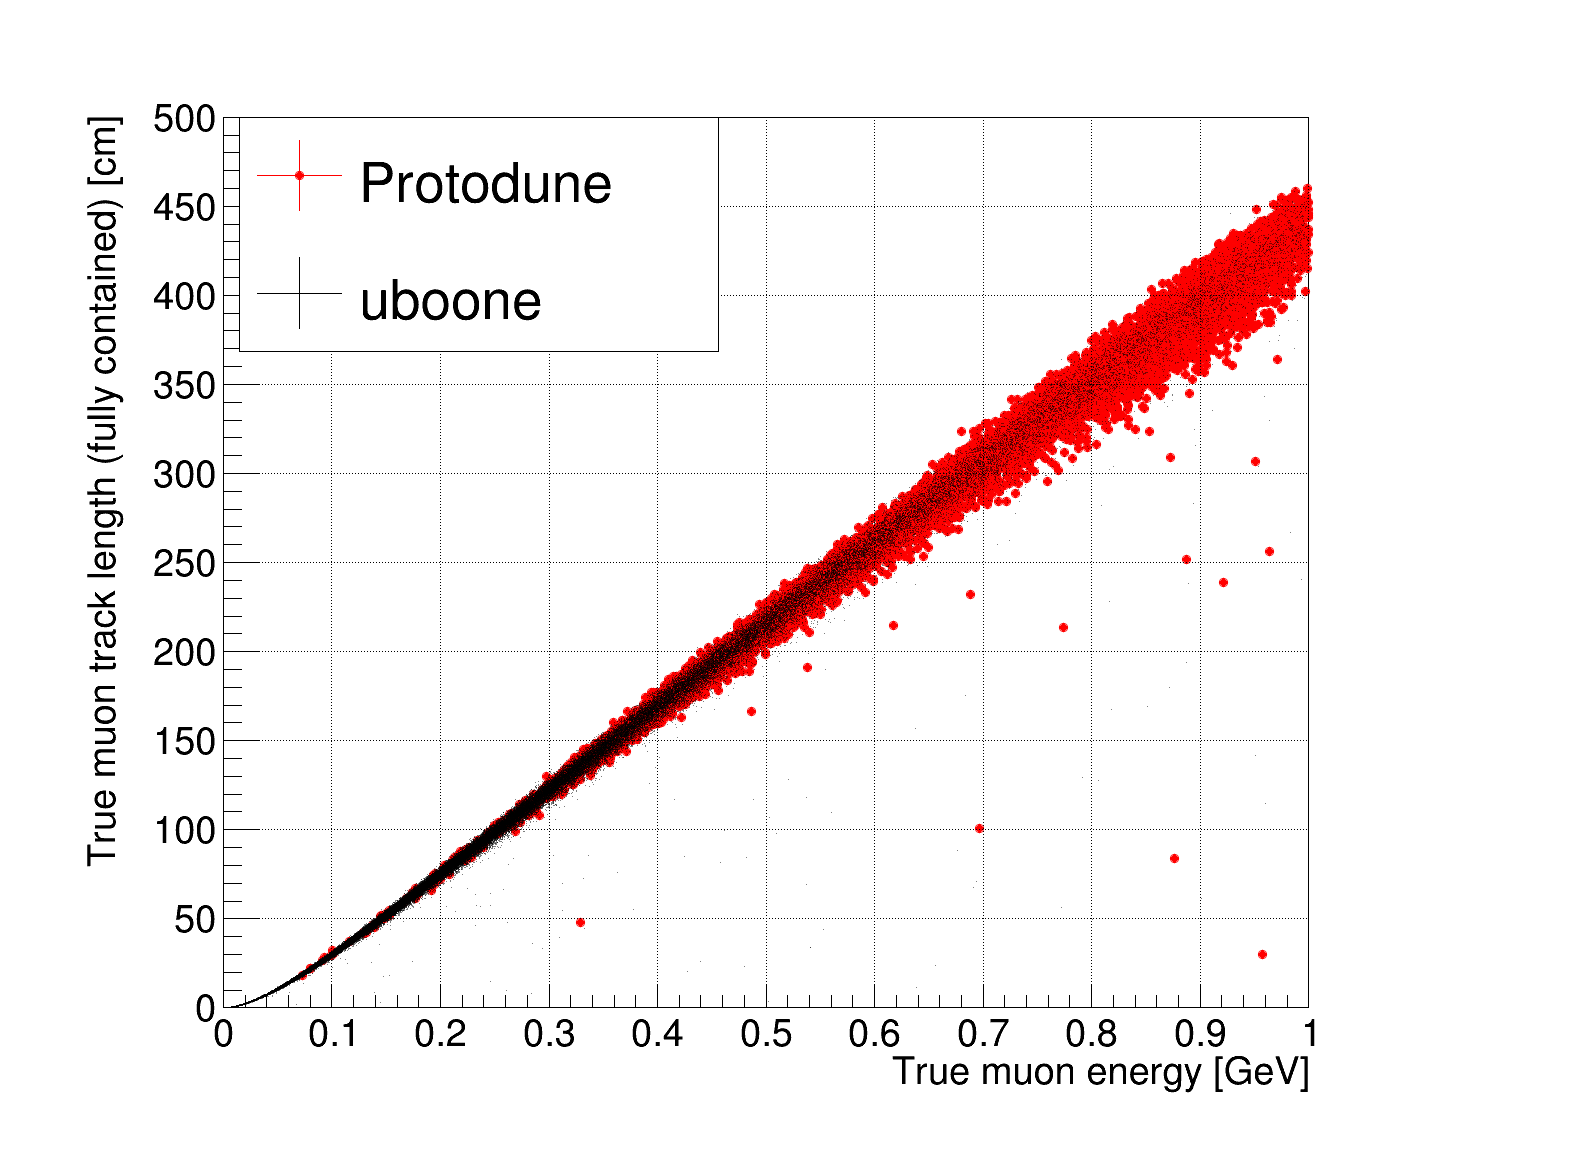

In [21]:
#f_proto = ROOT.TFile.Open('/home/tmettler/Downloads/kenergy_length_plots.root','read')
#h_proto = f_proto.Get('en_len')

h_proto.SetXTitle('True muon energy [GeV]')
h_proto.SetYTitle('True muon track length (fully contained) [cm]')
h_proto.SetMarkerColor(ROOT.kRed)
h_proto.SetMarkerStyle(19)
h_proto.SetLineColor(ROOT.kRed)
h_proto.Draw('')
h_uboone.SetMarkerColorAlpha(ROOT.kBlack,0.5)
h_uboone.SetLineColor(ROOT.kBlack)
h_uboone.Draw('same')
legend = ROOT.TLegend(0.15,0.7,0.45,0.9) # LEGEND Right
legend.AddEntry(h_proto,"Protodune","lep");
legend.AddEntry(h_uboone,"uboone","lep");
legend.Draw()
c1.Draw()
name = 'ProtoVsUBoone'
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")

In [14]:
dfsgfds

NameError: name 'dfsgfds' is not defined

In [ ]:
# check MC length for true contaiend tracks
startFidVol = '(MCle_Vx>(-1.55+10) && MCle_Vx<(254.8-10)) && (MCle_Vy>(-115.53+10) && MCle_Vy<(117.47-10)) &&(MCle_Vz>(-0.1+10) && MCle_Vz<(1036.9-50))'
endFidVol = '(MCle_Endx>(-1.55+10) && MCle_Endx<(254.8-10)) && (MCle_Endy>(-115.53+10) && MCle_Endy<(117.47-10)) &&(MCle_Endz>(-0.1+10) && MCle_Endz<(1036.9-50))'
cut = startFidVol+' && '+endFidVol+' && MCle_PDG==13'
name = 'TrueTrackLengthPerEnergy_ratio'

variableY = 'MCle_length'
variableX = 'MCle_Energy'
n_bin = 200
x_start = 0
x_end = 600
ny_bin = 200
y_start = 0
y_end = 1000
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
overlay_out.Draw(variableY+'/'+variableX+'>>h1',weight_name+'*('+cut+')')
h1.SetXTitle('Length/energy of true muon [cm/GeV]')
h1.SetYTitle('Entries per bin')
ROOT.gStyle.SetPaintTextFormat("0.1f");
ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetOptStat(0)
h1.Fit("gaus");
h1.Draw('colz')
c1.SetLogz(0)
c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")


 FCN=122.565 FROM MIGRAD    STATUS=CONVERGED      83 CALLS          84 TOTAL
                     EDM=1.00919e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.92923e+01   2.32011e+00   9.84833e-03  -3.64047e-04
   2  Mean         4.36373e+02   2.38839e-01   1.21919e-03  -7.61356e-04
   3  Sigma        1.20835e+01   1.81072e-01   1.63888e-05   1.64077e-01


Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/png/Length_800MeV.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/root/Length_800MeV.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/pdf/Length_800MeV.pdf has been created


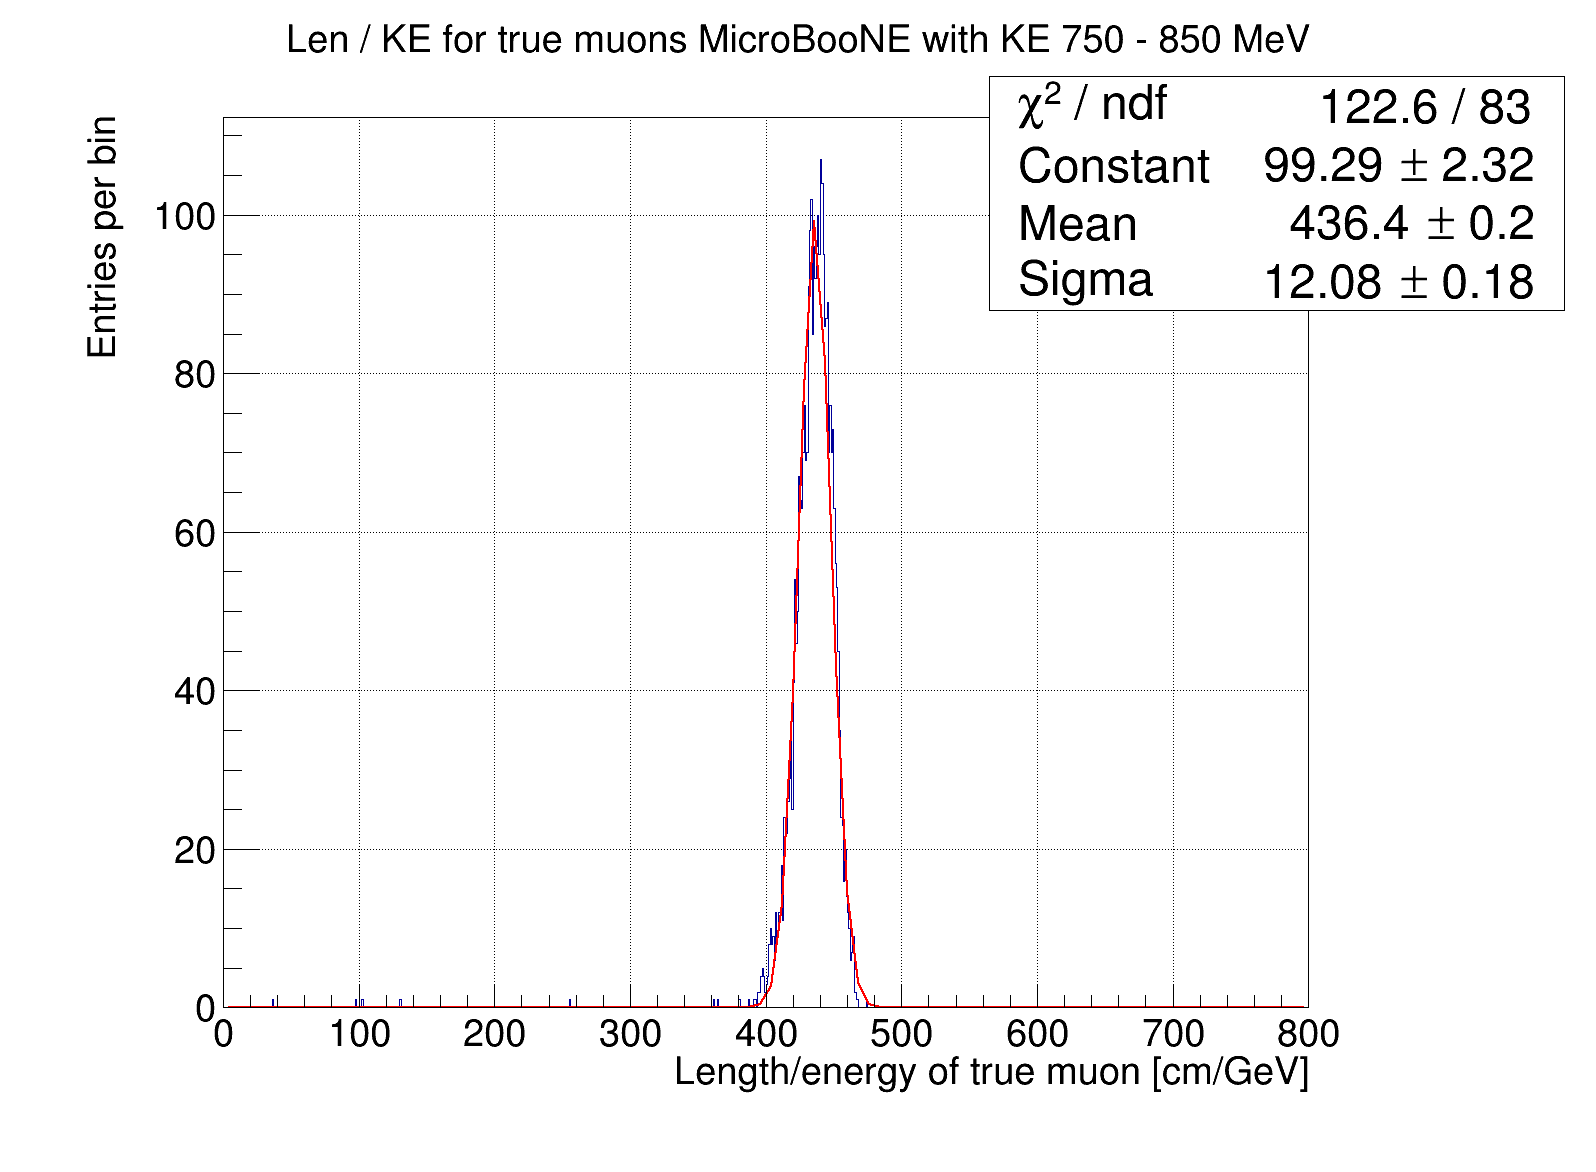

In [24]:
# check MC length for true contaiend tracks
startFidVol = '(MCle_Vx>(-1.55+10) && MCle_Vx<(254.8-10)) && (MCle_Vy>(-115.53+10) && MCle_Vy<(117.47-10)) &&(MCle_Vz>(-0.1+10) && MCle_Vz<(1036.9-50))'
endFidVol = '(MCle_Endx>(-1.55+10) && MCle_Endx<(254.8-10)) && (MCle_Endy>(-115.53+10) && MCle_Endy<(117.47-10)) &&(MCle_Endz>(-0.1+10) && MCle_Endz<(1036.9-50))'
cut = startFidVol+' && '+endFidVol+' && MCle_PDG==13 && abs(MCle_Energy-0.8)<0.05'
name = 'Length_800MeV'

variableY = 'MCle_length'
#variableX = '(MCle_Energy)'
variableX = '(sqrt(MCle_Energy*MCle_Energy + 0.105*0.105)-0.105)'

n_bin = 800
x_start = 0
x_end = 800
ny_bin = 200
y_start = 0
y_end = 1000
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
overlay_out.Draw(variableY+'/'+variableX+'>>h1',weight_name+'*('+cut+')')
h1.SetXTitle('Length/energy of true muon [cm/GeV]')
h1.SetYTitle('Entries per bin')
h1.SetTitle('Len / KE for true muons MicroBooNE with KE 750 - 850 MeV')
ROOT.gStyle.SetPaintTextFormat("0.1f");
ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(1)
h1.Fit("gaus");
h1.Draw('colz')
c1.SetLogz(0)
c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")


In [ ]:
fdsgsfdg

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_muon_cut_V'
side_right = 'right'
side_left = 'left'
start = time.time()
#NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name,side_left)
end = time.time()
print(end - start)

In [ ]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#mom_bins = [ 0.00, 0.225, 0.28, 0.33, 0.39, 0.52, 0.78, 1.21, 2.5]
binnum = len(mom_bins) - 1
print binnum
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

In [ ]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/20.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [ ]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.14)
c1.SetBottomMargin(0.14)

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
variableX = 'TrackMomMCS_mom'
variableY = 'TrackLength'
name = 'Excess_07_up1GeV_trklen_mcs_data'
n_bin = 20
x_start = 0
x_end = 2.5
ny_bin = 20
y_start = 0
y_end = 600
h1 = ROOT.TH2F('h1','h1',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h2 = ROOT.TH2F('h2','h2',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h3 = ROOT.TH2F('h3','h3',n_bin,x_start,x_end,ny_bin,y_start,y_end)

overlay_out.Draw(variableY+':'+variableX+'>>h1',cut)
ext_out.Draw(variableY+':'+variableX+'>>h2',cut)
data_out.Draw(variableY+':'+variableX+'>>h3',cut)
h1.Scale(scale[overlay])
h2.Scale(scale[ext])
h1.Add(h2,1)
h3.SetXTitle(variableX)
h3.SetYTitle(variableY)


#h3.Divide(h1)
#h3.SetMaximum(2)
#h3.SetMinimum(0)
h3.Draw('colz')
c1.SetLogz(1)

c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")



In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
variableX = 'TrackMomMCS_mom'
variableY = 'TrackLength'
name = 'Excess_07_up1GeV_trklen_mcs_10'
n_bin = 20
x_start = 0
x_end = 2.5
ny_bin = 20
y_start = 0
y_end = 600
h1 = ROOT.TH2F('h1','h1',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h11 = ROOT.TH2F('h11','h11',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h2 = ROOT.TH2F('h2','h2',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h3 = ROOT.TH2F('h3','h3',n_bin,x_start,x_end,ny_bin,y_start,y_end)

overlay_out.Draw(variableY+':'+variableX+'>>h1',weight_name+'*('+cut+')')
dirt_out.Draw(variableY+':'+variableX+'>>h11',weight_name+'*('+cut+')')
ext_out.Draw(variableY+':'+variableX+'>>h2',cut)
data_out.Draw(variableY+':'+variableX+'>>h3',cut)
h1.Scale(scale[overlay])
h11.Scale(scale[dirt])
h2.Scale(scale[ext])
h1.Add(h2,1)
h1.Add(h11,1)
h3.SetXTitle(variableX)
h3.SetYTitle(variableY)

for x in range(n_bin):
    for y in range(ny_bin):
        if(h3.GetBinContent(x+1,y+1)<10):
            h3.SetBinContent(x+1,y+1,0)
h3.Sumw2()    
h3.Divide(h1)
h3.SetMaximum(2)
h3.SetMinimum(0)
h3.Draw('colz')
c1.SetLogz(0)
c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")



In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1' #track_end_uncontained
variableX = 'TrackMomMCS_mom'
variableY = 'TrackMomRange_mu'
name = 'Excess_07_up1GeV_range_mcs_10'
weight_name = 'EventWeight*TunedCentralValue_Genie'

n_bin = 20
x_start = 0
x_end = 2
ny_bin = 20
y_start = 0
y_end = 2
h1 = ROOT.TH2F('h1','h1',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h11 = ROOT.TH2F('h11','h11',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h2 = ROOT.TH2F('h2','h2',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h3 = ROOT.TH2F('h3','h3',n_bin,x_start,x_end,ny_bin,y_start,y_end)

overlay_out.Draw(variableY+':'+variableX+'>>h1',weight_name+'*('+cut+')')
dirt_out.Draw(variableY+':'+variableX+'>>h11',weight_name+'*('+cut+')')
ext_out.Draw(variableY+':'+variableX+'>>h2',cut)
data_out.Draw(variableY+':'+variableX+'>>h3',cut)
h1.Scale(scale[overlay])
h11.Scale(scale[dirt])
h2.Scale(scale[ext])
#h1.Add(h2,1)
h3.Add(h2,-1)
h1.Add(h11,1)
h3.SetXTitle(variableX)
h3.SetYTitle(variableY)

for x in range(n_bin):
    for y in range(ny_bin):
        if(h3.GetBinContent(x+1,y+1)<10):
            h3.SetBinContent(x+1,y+1,0)
h3.Sumw2()          
h3.Divide(h1)
h3.SetMaximum(2)
h3.SetMinimum(0)
ROOT.gStyle.SetPaintTextFormat("0.1f");
h3.Draw('colz text')
c1.SetLogz(0)
c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")



In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1' #track_end_uncontained
variableX = 'TrackMomMCS_mom'
variableY = 'TrackMomRange_mu'
name = 'Excess_07_up1GeV_range_per_mcs_10'
weight_name = 'EventWeight*TunedCentralValue_Genie'

n_bin = 20
x_start = 0
x_end = 2
ny_bin = 20
y_start = 0
y_end = 2
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h11 = ROOT.TH1F('h11','h11',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)

overlay_out.Draw(variableY+'/'+variableX+'>>h1',weight_name+'*('+cut+')')
dirt_out.Draw(variableY+'/'+variableX+'>>h11',weight_name+'*('+cut+')')
ext_out.Draw(variableY+'/'+variableX+'>>h2',cut)
data_out.Draw(variableY+'/'+variableX+'>>h3',cut)
h1.Scale(scale[overlay])
h11.Scale(scale[dirt])
h2.Scale(scale[ext])
#h1.Add(h2,1)
h3.Add(h2,-1)
h1.Add(h11,1)
h3.SetXTitle(variableY+'/'+variableX)
#h3.SetYTitle(variableY)

for x in range(n_bin):
    for y in range(ny_bin):
        if(h3.GetBinContent(x+1,y+1)<10):
            h3.SetBinContent(x+1,y+1,0)
h3.Sumw2()          
h3.Divide(h1)
h3.SetMaximum(2)
h3.SetMinimum(0)
ROOT.gStyle.SetPaintTextFormat("0.1f");
h3.Draw('E1 hist')
c1.SetLogz(0)
c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")



In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1' #track_end_uncontained
variableX = 'TrackMomMCS_mom'
variableY = 'TrackMomRange_mu'
name = 'Excess_07_up1GeV_range_per_mcs_10'
weight_name = 'EventWeight*TunedCentralValue_Genie'

n_bin = 100
x_start = 0
x_end = 2
ny_bin = 20
y_start = 0
y_end = 2
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h11 = ROOT.TH1F('h11','h11',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)

#overlay_out.Draw(variableY+'/'+variableX+'>>h1',weight_name+'*('+cut+')')
data_out.Draw(variableY+'/'+variableX+'>>h11',cut+' && track_end_uncontained')
data_out.Draw(variableY+'/'+variableX+'>>h2',cut+' && !track_end_uncontained')
data_out.Draw(variableY+'/'+variableX+'>>h3',cut)
#h1.Scale(scale[overlay])
#h11.Scale(scale[dirt])
#h2.Scale(scale[ext])
#h1.Add(h2,1)
#h3.Add(h2,-1)
#h1.Add(h11,1)
h3.SetXTitle(variableY+'/'+variableX)
#h3.SetYTitle(variableY)

#for x in range(n_bin):
#    for y in range(ny_bin):
#        if(h3.GetBinContent(x+1,y+1)<10):
#            h3.SetBinContent(x+1,y+1,0)
h2.SetLineColor(ROOT.kGreen)
h11.SetLineColor(ROOT.kRed)
h3.Sumw2()          
#h3.Divide(h1)
#h3.SetMaximum(2)
#h3.SetMinimum(0)
ROOT.gStyle.SetPaintTextFormat("0.1f");
h3.Draw('E1 hist')
h11.Draw('same hist')
h2.Draw('same hist')
c1.SetLogz(0)
c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")



In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1' #track_end_uncontained
cut+= ' && abs((TrackMomRange_mu+0.8)/TrackMomMCS_mom-1)<0.1'
variableX = 'TrackMomMCS_mom'
variableY = 'TrackMomRange_mu'
name = 'Excess_07_up1GeV__mcs_10'
weight_name = 'EventWeight*TunedCentralValue_Genie'

n_bin = 20
x_start = 0
x_end = 2
ny_bin = 20
y_start = 0
y_end = 2
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h11 = ROOT.TH1F('h11','h11',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)

overlay_out.Draw(variableX+'>>h1',weight_name+'*('+cut+')')
dirt_out.Draw(variableX+'>>h11',weight_name+'*('+cut+')')
ext_out.Draw(variableX+'>>h2',cut)
data_out.Draw(variableX+'>>h3',cut)
h1.Scale(scale[overlay])
h11.Scale(scale[dirt])
h2.Scale(scale[ext])
#h1.Add(h2,1)
h3.Add(h2,-1)
h1.Add(h11,1)
h3.SetXTitle(variableX)
#h3.SetYTitle(variableY)

for x in range(n_bin):
    for y in range(ny_bin):
        if(h3.GetBinContent(x+1,y+1)<10):
            h3.SetBinContent(x+1,y+1,0)
h3.Sumw2()          
h3.Divide(h1)
h3.SetMaximum(2)
h3.SetMinimum(0)
ROOT.gStyle.SetPaintTextFormat("0.1f");
h3.Draw('E1 hist')
c1.SetLogz(0)
c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")



In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1' #track_end_uncontained
cut+= ' && abs((TrackMomRange_mu+TrackMomMCS_mom)/TrackMomMCS_mom)<0.1'
variableX = 'TrackMomMCS_mom'
variableY = 'TrackMomRange_mu'
name = 'Excess_07_up1GeV__mcs_10'
weight_name = 'EventWeight*TunedCentralValue_Genie'

n_bin = 100
x_start = 0
x_end = 2
ny_bin = 20
y_start = 0
y_end = 2
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h11 = ROOT.TH1F('h11','h11',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)

overlay_out.Draw(variableX+'>>h1',weight_name+'*('+cut+')')
dirt_out.Draw(variableX+'>>h11',weight_name+'*('+cut+')')
ext_out.Draw(variableX+'>>h2',cut)
data_out.Draw(variableX+'>>h3',cut)
h1.Scale(scale[overlay])
h11.Scale(scale[dirt])
h2.Scale(scale[ext])
#h1.Add(h2,1)
h3.Add(h2,-1)
h1.Add(h11,1)
h3.SetXTitle(variableX)
#h3.SetYTitle(variableY)

for x in range(n_bin):
    for y in range(ny_bin):
        if(h3.GetBinContent(x+1,y+1)<10):
            h3.SetBinContent(x+1,y+1,0)
h3.Sumw2()          
h3.Divide(h1)
h3.SetMaximum(2)
h3.SetMinimum(0)
ROOT.gStyle.SetPaintTextFormat("0.1f");
h3.Draw('E1 hist')
c1.SetLogz(0)
c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")



In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
variableX = 'TrackMomRange_mu'
variableY = 'TrackLength'
name = 'Excess_07_up1GeV_trklen_range'
n_bin = 20
x_start = 0
x_end = 2.5
ny_bin = 20
y_start = 0
y_end = 600
h1 = ROOT.TH2F('h1','h1',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h2 = ROOT.TH2F('h2','h2',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h3 = ROOT.TH2F('h3','h3',n_bin,x_start,x_end,ny_bin,y_start,y_end)

overlay_out.Draw(variableY+':'+variableX+'>>h1',cut)
ext_out.Draw(variableY+':'+variableX+'>>h2',cut)
data_out.Draw(variableY+':'+variableX+'>>h3',cut)
h1.Scale(scale[overlay])
h2.Scale(scale[ext])
h1.Add(h2,1)
h3.SetXTitle(variableX)
h3.SetYTitle(variableY)

h3.Divide(h1)
h3.SetMaximum(2)
h3.SetMinimum(0)
h3.Draw('colz')
c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")



In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && TrackMomMCS_mom>1.0'
variableX = 'Nu_Vx_sce'
variableY = 'Nu_Vy_sce'
name = 'Excess_07_up1GeV_Vtx_XY'
n_bin = 20
x_start = 0
x_end = 256
ny_bin = 20
y_start = -120
y_end = 120
h1 = ROOT.TH2F('h1','h1',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h2 = ROOT.TH2F('h2','h2',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h3 = ROOT.TH2F('h3','h3',n_bin,x_start,x_end,ny_bin,y_start,y_end)

overlay_out.Draw(variableY+':'+variableX+'>>h1',cut)
ext_out.Draw(variableY+':'+variableX+'>>h2',cut)
data_out.Draw(variableY+':'+variableX+'>>h3',cut)
h1.Scale(scale[overlay])
h2.Scale(scale[ext])
h1.Add(h2,1)
h3.SetXTitle(variableX)
h3.SetYTitle(variableY)

h3.Divide(h1)
h3.SetMaximum(2)
h3.SetMinimum(0)
h3.Draw('colz')
c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")



In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && TrackMomMCS_mom>1.0'
variableX = 'Nu_Vx_sce'
variableY = 'Nu_Vz_sce'
name = 'Excess_07_up1GeV_Vtx_XZ'
n_bin = 20
x_start = 0
x_end = 256
ny_bin = 20
y_start = 0
y_end = 1050
h1 = ROOT.TH2F('h1','h1',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h2 = ROOT.TH2F('h2','h2',n_bin,x_start,x_end,ny_bin,y_start,y_end)
h3 = ROOT.TH2F('h3','h3',n_bin,x_start,x_end,ny_bin,y_start,y_end)

overlay_out.Draw(variableY+':'+variableX+'>>h1',cut)
ext_out.Draw(variableY+':'+variableX+'>>h2',cut)
data_out.Draw(variableY+':'+variableX+'>>h3',cut)
h1.Scale(scale[overlay])
h2.Scale(scale[ext])
h1.Add(h2,1)
h3.SetXTitle(variableX)
h3.SetYTitle(variableY)

h3.Divide(h1)
h3.SetMaximum(2)
h3.SetMinimum(0)
h3.Draw('colz')
c1.Draw()
c1.SaveAs(outputdir_png + name+".png")
c1.SaveAs(outputdir_root + name+".root")
c1.SaveAs(outputdir_pdf + name+".pdf")



In [ ]:
dsfgs

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && TrackMomMCS_mom>1.0'
name = '_07_up1GeV'
side_right = 'right'
side_left = 'left'
#folder = 'All_cuts/'
print 'All cuts'
NuCC_w.make_stacked_histo_MCC8_pub(cut,'Nu_Vx_sce','EventWeight','#nu_{#mu}^{reco} vertex X position [cm]',-10,270,20,'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'Nu_Vy_sce','EventWeight','#nu_{#mu}^{reco} vertex Y position [cm]',-120,120,20,'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'Nu_Vz_sce','EventWeight','#nu_{#mu}^{reco} vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,1.5,20,'TrackMCSRange'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,1.5,20,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,1.5,20,'TrackMomR'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'cos(TrackTheta)','EventWeight','cos(#theta_{#mu}^{reco})',-1,1.001,20,'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPhi','EventWeight','#phi_{#mu}^{reco}',-3.15,3.15,20,'phi'+name,side_left)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,600,50,'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPID_chiproton','EventWeight','Track PID proton',0,350,20,'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPID_chimuon','EventWeight','Track PID muon',0,60,20,'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPID_chipion','EventWeight','Track PID pion',0,60,20,'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_MCC8_pub(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID muon/proton ration',0,0.25,20,'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID muon/pion ration',0.4,1.2,20,'PIDmupion_ration'+name,'right')
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,'CRTTophit'+name,'right')
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackScore','EventWeight','Track Score',0.5,1.001,20,'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'NuScore','EventWeight','Topological score',0,1.001,20,'NuScore'+name,'right')
NuCC_w.make_stacked_histo_MCC8_pub(cut + ' && 1','NuTracks','EventWeight','Track Multiplicity',0,10,10,'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut + ' && 1','NumPfp','EventWeight','Particle Multiplicity',0,10,10,'NumPfp'+name,side_right)
#NuCC_w.make_stacked_histo_onoff_pub(cut,'(nr_crthit_top==0)','EventWeight','nr_crthit_top',0,2,2,'CRTTophit_cut'+name,side_left,'has CRTHit in Top','has No CRTHit in Top')
#NuCC_w.make_stacked_histo_onoff_pub(cut,'(crthit_vertex_zcut==0)','EventWeight','nr_crthit_top',0,2,2,'CRTvertex_cut'+name,side_left,'has uptream CRTHit','has No upstreamCRTHit')
#NuCC_w.make_stacked_histo_onoff_pub(cut,'(track_end_uncontained==1 || nr_crthit_beam_tres==0)','EventWeight','nr_crthit_top',0,2,2,'CRTcontVeto_cut'+name,side_left,'Veto for cont. event','No Veto')
#NuCC_w.make_stacked_histo_onoff_pub(cut,'crt_cut','EventWeight','nr_crthit_top',0,2,2,'CRTAsso_cut'+name,side_left,'has as. CRTHit off beam','has No as. CRTHit off beam')

In [ ]:
fdsgfdsg

Normalization (data)/(mc +ext) =  1.01727408643
Normalization (data)/(mc +ext) =  1.01585339462


1.0158533946236619

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/png/TrackMomMCS_crr_2_07.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/pdf/TrackMomMCS_crr_2_07.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/root/TrackMomMCS_crr_2_07.root has been created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_play_fullRun3/png/TrackMomMCS_corr2_2_07.png has been created
Info in <TCanvas::Print>: pdf 

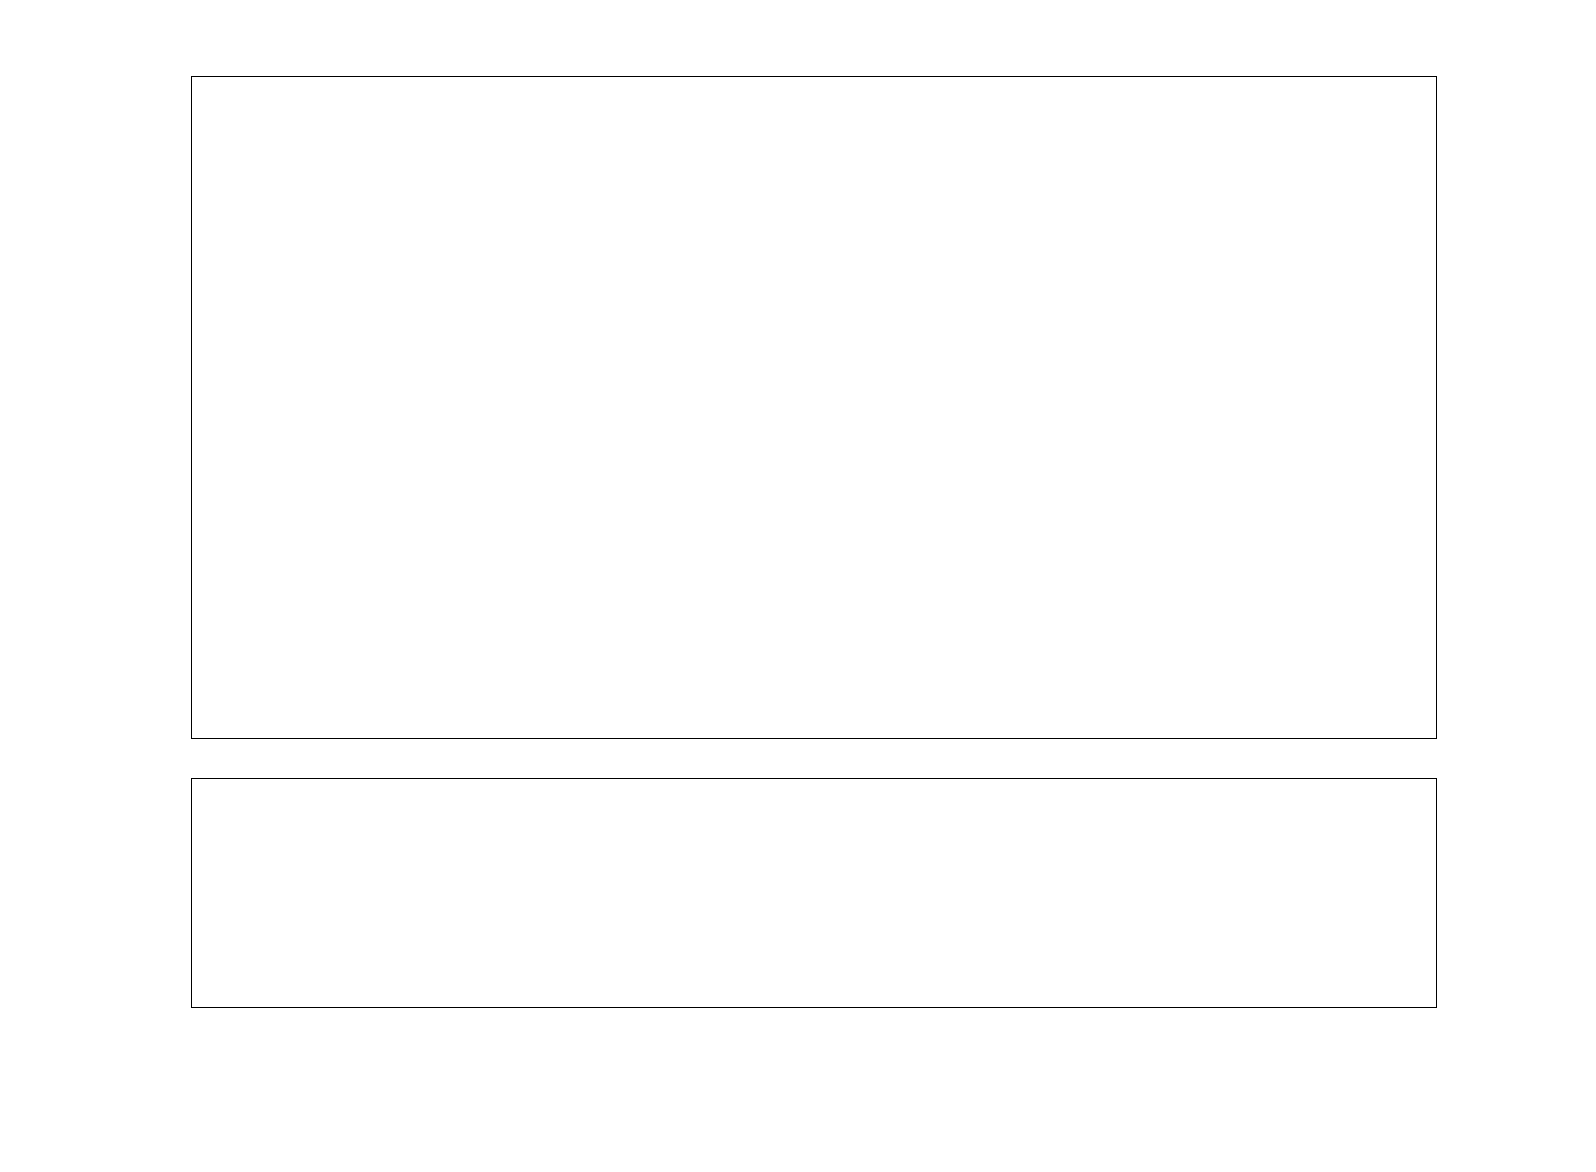

In [52]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
#       +' && TrackStart_x_sce>125 && TrackEnd_x_sce>125'
name = '_07'
side_right = 'right'
side_left = 'left'
#sqrt(MCle_Energy*MCle_Energy + 0.105*0.105)-0.105
#NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,2.5,50,'TrackMCSRange'+name,side_right)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub_corr1(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS_crr_2'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub_corr2(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS_corr2_2'+name,side_right)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'(sqrt(TrackMomRange_mu*TrackMomRange_mu + 0.105*0.105)-0.105)','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,100,25,'TrackLength_zoom'+name,'right')

In [ ]:
fdasgsdfg

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
side_right = 'right'
side_left = 'left'

NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackEnd_x','EventWeight','End of track X (not corrected) [cm]' ,-10,10,100,'TrackEnd_x_sce_1_nosce'+name,side_right)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackEnd_y_sce','EventWeight','End of track Y (sce corrected) [cm]' ,110,120,100,'TrackEnd_y_sce_2'+name,side_right)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackEnd_z_sce','EventWeight','End of track Z (sce corrected) [cm]' ,1030,1050,100,'TrackEnd_z_sce_2'+name,side_right)

In [ ]:
safdasdf

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && NuTracks==1'
name = '_07_1_track'
side_right = 'right'
side_left = 'left'

NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,2.5,50,'TrackMCSRange'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,600,50,'TrackLength'+name,'right')

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && NuTracks==2'
name = '_07_2_track'
side_right = 'right'
side_left = 'left'

NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,2.5,50,'TrackMCSRange'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,600,50,'TrackLength'+name,'right')

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && NuTracks==3'
name = '_07_3_track'
side_right = 'right'
side_left = 'left'

NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,2.5,50,'TrackMCSRange'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,600,50,'TrackLength'+name,'right')

In [ ]:
# for contained only

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && NuTracks==1 && !track_end_uncontained'
name = '_07_1_cont_track'
side_right = 'right'
side_left = 'left'

NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,2.5,50,'TrackMCSRange'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,600,50,'TrackLength'+name,'right')

cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && NuTracks==2 && !track_end_uncontained'
name = '_07_2_cont_track'
side_right = 'right'
side_left = 'left'

NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,2.5,50,'TrackMCSRange'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,600,50,'TrackLength'+name,'right')

cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && NuTracks==3 && !track_end_uncontained'
name = '_07_3_cont_track'
side_right = 'right'
side_left = 'left'

NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,2.5,50,'TrackMCSRange'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,600,50,'TrackLength'+name,'right')

In [ ]:
# now for uncontained

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && NuTracks==1 && track_end_uncontained'
name = '_07_1_uncont_track'
side_right = 'right'
side_left = 'left'

NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,2.5,50,'TrackMCSRange'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,600,50,'TrackLength'+name,'right')

cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && NuTracks==2 && track_end_uncontained'
name = '_07_2_uncont_track'
side_right = 'right'
side_left = 'left'

NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,2.5,50,'TrackMCSRange'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,600,50,'TrackLength'+name,'right')

cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && NuTracks==3 && track_end_uncontained'
name = '_07_3_uncont_track'
side_right = 'right'
side_left = 'left'

NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,2.5,50,'TrackMCSRange'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,600,50,'TrackLength'+name,'right')

In [ ]:
fsfdgsfgsfd

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
variable = 'Genie_Q2'
n_bin = 50
x_start = 0
x_end = 4
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)
overlay_out.Draw('Genie_Q2>>h1',cut)
overlay_out.Draw('Genie_Q2>>h2',cut+' && !track_end_uncontained')
overlay_out.Draw('Genie_Q2>>h3',cut+'&& track_end_uncontained')
h1.Scale(scale[overlay])
h1.SetXTitle(variable)
h2.Scale(scale[overlay])
h3.Scale(scale[overlay])
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
#legend = ROOT.TLegend(0.15,0.7,0.55,0.9) # LEGEND LEFT
legend = ROOT.TLegend(0.55,0.7,0.95,0.9) # LEGEND Right
legend.AddEntry(h1,"All","lep");
legend.AddEntry(h2,"Contained","lep");
legend.AddEntry(h3,"Uncontained","lep");
h1.Draw('hist')
h2.Draw('hist same')
h3.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + variable+".png")
c1.SaveAs(outputdir_root + variable+".root")
c1.SaveAs(outputdir_pdf + variable+".pdf")

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
variable = 'Genie_q2'
n_bin = 50
x_start = -4
x_end = 0
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)
overlay_out.Draw(variable+'>>h1',cut)
overlay_out.Draw(variable+'>>h2',cut+' && !track_end_uncontained')
overlay_out.Draw(variable+'>>h3',cut+'&& track_end_uncontained')
h1.Scale(scale[overlay])
h1.SetXTitle(variable)
h2.Scale(scale[overlay])
h3.Scale(scale[overlay])
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
legend = ROOT.TLegend(0.15,0.7,0.55,0.9) # LEGEND LEFT
#legend = ROOT.TLegend(0.55,0.7,0.95,0.9) # LEGEND Right
legend.AddEntry(h1,"All","lep");
legend.AddEntry(h2,"Contained","lep");
legend.AddEntry(h3,"Uncontained","lep");
h1.Draw('hist')
h2.Draw('hist same')
h3.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + variable+".png")
c1.SaveAs(outputdir_root + variable+".root")
c1.SaveAs(outputdir_pdf + variable+".pdf")

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
variable = 'Genie_W'
n_bin = 50
x_start = 0
x_end = 3
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)
overlay_out.Draw(variable+'>>h1',cut)
overlay_out.Draw(variable+'>>h2',cut+' && !track_end_uncontained')
overlay_out.Draw(variable+'>>h3',cut+'&& track_end_uncontained')
h1.Scale(scale[overlay])
h1.SetXTitle(variable)
h2.Scale(scale[overlay])
h3.Scale(scale[overlay])
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
legend = ROOT.TLegend(0.15,0.7,0.55,0.9) # LEGEND LEFT
#legend = ROOT.TLegend(0.55,0.7,0.95,0.9) # LEGEND Right
legend.AddEntry(h1,"All","lep");
legend.AddEntry(h2,"Contained","lep");
legend.AddEntry(h3,"Uncontained","lep");
h1.Draw('hist')
h2.Draw('hist same')
h3.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + variable+".png")
c1.SaveAs(outputdir_root + variable+".root")
c1.SaveAs(outputdir_pdf + variable+".pdf")

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
variable = 'Genie_T'
n_bin = 50
x_start = 0
x_end = 0.1
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)
overlay_out.Draw(variable+'>>h1',cut)
overlay_out.Draw(variable+'>>h2',cut+' && !track_end_uncontained')
overlay_out.Draw(variable+'>>h3',cut+'&& track_end_uncontained')
h1.Scale(scale[overlay])
h1.SetXTitle(variable)
h2.Scale(scale[overlay])
h3.Scale(scale[overlay])
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
legend = ROOT.TLegend(0.15,0.7,0.55,0.9) # LEGEND LEFT
#legend = ROOT.TLegend(0.55,0.7,0.95,0.9) # LEGEND Right
legend.AddEntry(h1,"All","lep");
legend.AddEntry(h2,"Contained","lep");
legend.AddEntry(h3,"Uncontained","lep");
h1.Draw('hist')
h2.Draw('hist same')
h3.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + variable+".png")
c1.SaveAs(outputdir_root + variable+".root")
c1.SaveAs(outputdir_pdf + variable+".pdf")

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
variable = 'Genie_X'
n_bin = 50
x_start = 0
x_end = 4
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)
overlay_out.Draw(variable+'>>h1',cut)
overlay_out.Draw(variable+'>>h2',cut+' && !track_end_uncontained')
overlay_out.Draw(variable+'>>h3',cut+'&& track_end_uncontained')
h1.Scale(scale[overlay])
h1.SetXTitle(variable)
h2.Scale(scale[overlay])
h3.Scale(scale[overlay])
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
#legend = ROOT.TLegend(0.15,0.7,0.55,0.9) # LEGEND LEFT
legend = ROOT.TLegend(0.55,0.7,0.95,0.9) # LEGEND Right
legend.AddEntry(h1,"All","lep");
legend.AddEntry(h2,"Contained","lep");
legend.AddEntry(h3,"Uncontained","lep");
h1.Draw('hist')
h2.Draw('hist same')
h3.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + variable+".png")
c1.SaveAs(outputdir_root + variable+".root")
c1.SaveAs(outputdir_pdf + variable+".pdf")

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
variable = 'Genie_Y'
n_bin = 50
x_start = 0
x_end = 1
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)
overlay_out.Draw(variable+'>>h1',cut)
overlay_out.Draw(variable+'>>h2',cut+' && !track_end_uncontained')
overlay_out.Draw(variable+'>>h3',cut+'&& track_end_uncontained')
h1.Scale(scale[overlay])
h1.SetXTitle(variable)
h2.Scale(scale[overlay])
h3.Scale(scale[overlay])
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
#legend = ROOT.TLegend(0.15,0.7,0.55,0.9) # LEGEND LEFT
legend = ROOT.TLegend(0.55,0.7,0.95,0.9) # LEGEND Right
legend.AddEntry(h1,"All","lep");
legend.AddEntry(h2,"Contained","lep");
legend.AddEntry(h3,"Uncontained","lep");
h1.Draw('hist')
h2.Draw('hist same')
h3.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + variable+".png")
c1.SaveAs(outputdir_root + variable+".root")
c1.SaveAs(outputdir_pdf + variable+".pdf")

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
variable = 'Genie_nNeutron_preFSI'
n_bin = 3
x_start = 0
x_end = 3
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)
overlay_out.Draw(variable+'>>h1',cut)
overlay_out.Draw(variable+'>>h2',cut+' && !track_end_uncontained')
overlay_out.Draw(variable+'>>h3',cut+'&& track_end_uncontained')
h1.Scale(scale[overlay])
h1.SetXTitle(variable)
h2.Scale(scale[overlay])
h3.Scale(scale[overlay])
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
#legend = ROOT.TLegend(0.15,0.7,0.55,0.9) # LEGEND LEFT
legend = ROOT.TLegend(0.55,0.7,0.95,0.9) # LEGEND Right
legend.AddEntry(h1,"All","lep");
legend.AddEntry(h2,"Contained","lep");
legend.AddEntry(h3,"Uncontained","lep");
h1.Draw('hist')
h2.Draw('hist same')
h3.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + variable+".png")
c1.SaveAs(outputdir_root + variable+".root")
c1.SaveAs(outputdir_pdf + variable+".pdf")

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
variable = 'Genie_nProton_preFSI'
n_bin = 3
x_start = 0
x_end = 3
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)
overlay_out.Draw(variable+'>>h1',cut)
overlay_out.Draw(variable+'>>h2',cut+' && !track_end_uncontained')
overlay_out.Draw(variable+'>>h3',cut+'&& track_end_uncontained')
h1.Scale(scale[overlay])
h1.SetXTitle(variable)
h2.Scale(scale[overlay])
h3.Scale(scale[overlay])
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
#legend = ROOT.TLegend(0.15,0.7,0.55,0.9) # LEGEND LEFT
legend = ROOT.TLegend(0.55,0.7,0.95,0.9) # LEGEND Right
legend.AddEntry(h1,"All","lep");
legend.AddEntry(h2,"Contained","lep");
legend.AddEntry(h3,"Uncontained","lep");
h1.Draw('hist')
h2.Draw('hist same')
h3.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + variable+".png")
c1.SaveAs(outputdir_root + variable+".root")
c1.SaveAs(outputdir_pdf + variable+".pdf")

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
variable = 'Genie_nPi0_preFSI'
n_bin = 9
x_start = 0
x_end = 9
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)
overlay_out.Draw(variable+'>>h1',cut)
overlay_out.Draw(variable+'>>h2',cut+' && !track_end_uncontained')
overlay_out.Draw(variable+'>>h3',cut+'&& track_end_uncontained')
h1.Scale(scale[overlay])
h1.SetXTitle(variable)
h2.Scale(scale[overlay])
h3.Scale(scale[overlay])
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
#legend = ROOT.TLegend(0.15,0.7,0.55,0.9) # LEGEND LEFT
legend = ROOT.TLegend(0.55,0.7,0.95,0.9) # LEGEND Right
legend.AddEntry(h1,"All","lep");
legend.AddEntry(h2,"Contained","lep");
legend.AddEntry(h3,"Uncontained","lep");
h1.Draw('hist')
h2.Draw('hist same')
h3.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + variable+".png")
c1.SaveAs(outputdir_root + variable+".root")
c1.SaveAs(outputdir_pdf + variable+".pdf")

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
variable = 'Genie_nPiPlus_preFSI'
n_bin = 6
x_start = 0
x_end = 6
h1 = ROOT.TH1F('h1','h1',n_bin,x_start,x_end)
h2 = ROOT.TH1F('h2','h2',n_bin,x_start,x_end)
h3 = ROOT.TH1F('h3','h3',n_bin,x_start,x_end)
overlay_out.Draw(variable+'>>h1',cut)
overlay_out.Draw(variable+'>>h2',cut+' && !track_end_uncontained')
overlay_out.Draw(variable+'>>h3',cut+'&& track_end_uncontained')
h1.Scale(scale[overlay])
h1.SetXTitle(variable)
h2.Scale(scale[overlay])
h3.Scale(scale[overlay])
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
#legend = ROOT.TLegend(0.15,0.7,0.55,0.9) # LEGEND LEFT
legend = ROOT.TLegend(0.55,0.7,0.95,0.9) # LEGEND Right
legend.AddEntry(h1,"All","lep");
legend.AddEntry(h2,"Contained","lep");
legend.AddEntry(h3,"Uncontained","lep");
h1.Draw('hist')
h2.Draw('hist same')
h3.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + variable+".png")
c1.SaveAs(outputdir_root + variable+".root")
c1.SaveAs(outputdir_pdf + variable+".pdf")

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
side_right = 'right'
side_left = 'left'


NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,2.5,50,'TrackMCSRange'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,600,50,'TrackLength'+name,'right')

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && track_end_uncontained'
name = '_07_uncont'
side_right = 'right'
side_left = 'left'


NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,2.5,50,'TrackMCSRange'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,600,50,'TrackLength'+name,'right')

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && !track_end_uncontained'
name = '_07_contained'
side_right = 'right'
side_left = 'left'


NuCC_w.make_stacked_histo_MCC8_pub_impMom(cut,'EventWeight','p_{#mu}^{reco} (MCS+range) [GeV]' ,0,2.5,50,'TrackMCSRange'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,2.5,50,'TrackMomMCS'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomRange_mu','EventWeight','p_{#mu}^{reco} range [GeV]' ,0,2.5,50,'TrackMomR'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,600,50,'TrackLength'+name,'right')

In [ ]:
xfgdfghdfgh

In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
side_right = 'right'
side_left = 'left'


#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom - TrackMomRange_mu','EventWeight','p_{#mu}^{reco} MCS - range [GeV]' ,-1,1,20,'Diff_MCS_range'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut+'&& !track_end_uncontained','TrackMomMCS_mom - TrackMomRange_mu','EventWeight','p_{#mu}^{reco} MCS - range [GeV]' ,-0.4,0.6,20,'Diff_MCS_range_contained'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut+'&& track_end_uncontained','TrackMomMCS_mom - TrackMomRange_mu','EventWeight','p_{#mu}^{reco} MCS - range [GeV]' ,-0.4,0.6,20,'Diff_MCS_range_uncont'+name,side_right)


In [ ]:
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
side_right = 'right'
side_left = 'left'


#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom - TrackMomRange_mu','EventWeight','p_{#mu}^{reco} MCS - range [GeV]' ,-1,1,20,'Diff_MCS_range'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut+'&& !track_end_uncontained','TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,1.8,40,'MCS_contained'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut+'&& track_end_uncontained','TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} MCS [GeV]' ,0,1.8,40,'MCS_uncont'+name,side_right)


In [ ]:
dasfdaswf

In [ ]:
# close the root file with all the histos
RootFile.Close()